# Are you on PC or MAC? pc = 0, mac = 1

In [295]:
computer = 0

# IF YOU RUN THIS PAGE FOR THE FIRST TIME : 

# START HERE

# OTHERWISE, YOU CAN START BELOW TO AVOID FETCHING ALL THE DATA AGAIN

In [33]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import pandas_datareader.data as web
import datetime
import pandas as pd
import os
import csv
import glob as glob
import tensorflow as tf

matplotlib.rcParams[ 'figure.figsize' ] = ( 14, 6 )



# 1) This first part is only accessing in a list all the tickers in our fund, via a csv

In [59]:
# In the file IBB_holdings.csv, the tickers are sorted by descending weigths as of 5-Feb-18
# The file contains a lot of information about the fund IBB as of 5-Feb-18, which can be imported via row[i], i being the column you want
# For now we only import the first column, tickers.

curdir = os.getcwd()

with open('IBB_holdings.csv', 'r') as csvfile:
    file = csv.reader(csvfile,delimiter=' ')
    c=0
    list_tickers=[]
    for row in file:
        if c>=11:
            list_tickers.append(row[0].split(',')[0])
        c+=1
            
csvfile.close()

list_tickers.sort()
list_tickers.pop()
list_tickers.remove("BLKFDS")
list_tickers.remove("USD")
#list_tickers.remove("SNDX")

# 2) We now want to download the data of all tickers as dataframes

In [35]:
# Setting up the variables

start_date = '2016-01-01'
end_date = '2018-01-01'


nb_tickers = len(list_tickers)
list_dataframes=[None]*(nb_tickers)

In [36]:
#On Yahoo
still_missing = nb_tickers
passages=0

while still_missing > 0 :
    passages += 1
    print("harvest number " , passages)
    for i in range (nb_tickers ):
        if type(list_dataframes[i]) == type(None):   
            symbol = list_tickers[i]
            try:
                df = web.DataReader(symbol, 'yahoo' , start_date ,end_date)
                list_dataframes[i] = df
                still_missing -= 1
            except:
                print("Oops!  That was no valid ticker.  Try again... "+list_tickers[i])

harvest number  1
Oops!  That was no valid ticker.  Try again... ABUS
Oops!  That was no valid ticker.  Try again... AGIO
Oops!  That was no valid ticker.  Try again... ALKS
Oops!  That was no valid ticker.  Try again... ALNY
Oops!  That was no valid ticker.  Try again... ANAB
Oops!  That was no valid ticker.  Try again... ARWR
Oops!  That was no valid ticker.  Try again... ASND
Oops!  That was no valid ticker.  Try again... BCRX
Oops!  That was no valid ticker.  Try again... BIIB
Oops!  That was no valid ticker.  Try again... BMRN
Oops!  That was no valid ticker.  Try again... CASC
Oops!  That was no valid ticker.  Try again... CERS
Oops!  That was no valid ticker.  Try again... CLVS
Oops!  That was no valid ticker.  Try again... CLXT
Oops!  That was no valid ticker.  Try again... CNCE
Oops!  That was no valid ticker.  Try again... ECYT
Oops!  That was no valid ticker.  Try again... FLXN
Oops!  That was no valid ticker.  Try again... FMI
Oops!  That was no valid ticker.  Try again... 

# 3) Finally, we can download in a new folder all this information for future use, to avoid downloading them from the web again

In [38]:
#Download of the dataframes as as many csv's (for now)
aimed_directory=cur_dir+'\\Data'
if not os.path.exists(aimed_directory):
    os.makedirs(aimed_directory)

for i in range (nb_tickers ):  
    file_name='csv_'+list_tickers[i]+'_from_'+start_date+'_to_'+end_date+".csv"
    string = aimed_directory+'\\'+file_name
    list_dataframes[i].to_csv(string , sep=',')

# 4) This program is not (yet) collecting the two tickers that are not equities : BLKFDS and USD

# 5) We also need a benchmark

In [39]:
# Here the benchmark is NASDAQ Biotechnology index 
symbol='^NBI'
benchmark1 = web.DataReader(symbol, 'yahoo' , start_date ,end_date)

In [40]:
# Here the benchmark is iShares Nasdaq Biotechnology ETF 
symbol='IBB'
benchmark2 = web.DataReader(symbol, 'yahoo' , start_date ,end_date)

# 6) Now we need rate of returns

In [41]:
df_ror_1 = benchmark1['High'].pct_change()
df_ror_2 = benchmark2['High'].pct_change()

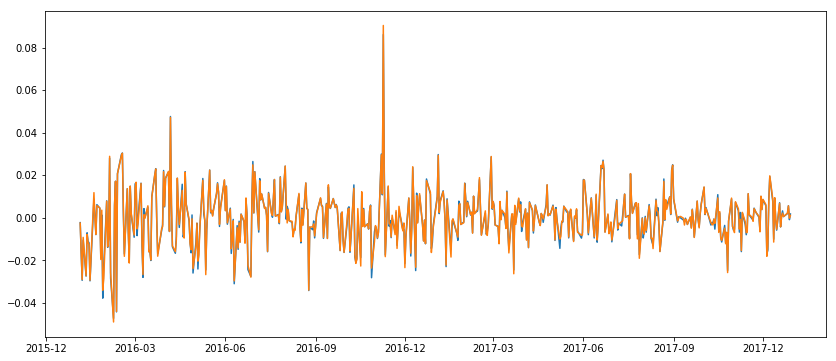

In [42]:
# Both benchmarks should have similar rate of returns, though they have different prices
plt.plot(df_ror_1)
plt.hold
plt.plot(df_ror_2)
plt.show;

In [43]:
def rateOfReturnWeekly(df,column):
    # Column has to be a column of the dataframe (ie 'Open','AdjClose')
    
    # Making sure dataframe is well sorted
    df_sorted = df.sort_index( ascending = True )
    

    # So far gives daily as shift = 1!
    shift = 1
    df_shifted = df_sorted.shift(shift)
    rate_of_returns = (df_sorted - df_shifted) / df_shifted
    rate_of_returns = rate_of_returns.drop(rate_of_returns.index[0])

    return rate_of_returns

# 7) Function to add noise to a dataframe (a new dataframe will be created)

In [49]:
def add_noise_2(df_origin, tick, mean = 0, std = 0.005):
    noise = []
    
    # Creating the noise
    for i in range(len(df_origin)):
        x = np.exp(np.random.normal(mean,std))
        noise.append(x)
        
    aimed_directory=cur_dir+'\Data'
    

    df_modified = df_origin.copy()
    df_modified['Adj Close'] = df_modified['Adj Close'].multiply(noise)
    file_name = 'csv_'+tick+'_B_'+str(mean)+'_'+str(std)+'_from_'+start_date+'_to_'+end_date+'.csv'
    string = aimed_directory+'\\'+file_name
    df_modified.to_csv(string , sep=',') 

# 8) Create all the new csv

In [61]:
allFiles = glob.glob(cur_dir+"\Data\*.csv")


i=0
for file_ in allFiles:
    with open(file_, 'r') as csvfile:
        if list_tickers[i] != 'SNDX':
            df = pd.read_csv(csvfile, index_col=None, header=0)
            add_noise_2(df,list_tickers[i],0,0.01)
            #add_noise_2(df,list_tickers[i],0,0.008)
            #add_noise_2(df,list_tickers[i],0,0.0003)
            #add_noise_2(df,list_tickers[i],0,0.002)
            #add_noise_2(df,list_tickers[i],0,0.0006)
        i=i+1
    csvfile.close()
    

# IF YOU RUN THIS PAGE FOR THE SECOND TIME : 

# START HERE

In [285]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import pandas_datareader.data as web
import datetime
import pandas as pd
import os
import csv
import glob as glob
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

matplotlib.rcParams[ 'figure.figsize' ] = ( 14, 6 )

In [286]:
cur_dir = os.getcwd()

with open('IBB_holdings.csv', 'r') as csvfile:
    file = csv.reader(csvfile,delimiter=' ')
    c=0
    list_tickers=[]
    for row in file:
        if c>=11:
            list_tickers.append(row[0].split(',')[0])
        c+=1
            
csvfile.close()

list_tickers.sort()
list_tickers.pop()
list_tickers.remove("BLKFDS")
list_tickers.remove("USD")
list_tickers.remove("SNDX")

In [287]:
nb_tickers = len(list_tickers)
list_dataframes=[None]*(2*nb_tickers+1) #SNDX
data = np.array([np.zeros(503)]*(2*nb_tickers)) 

allFiles = glob.glob(cur_dir+"\Data\*.csv")
i = 0
compt = 0
for file_ in allFiles:
    with open(file_, 'r') as csvfile:
        df = pd.read_csv(csvfile, index_col=None, header=0)
        list_dataframes[i] = df
        arr = np.array(df['Adj Close'])
        if len(arr) == 503 and not df.isnull().values.any():    
            mini = np.min(arr)
            maxi = np.max(arr)
            arr = (arr - mini) / (maxi - mini)
            data[i] = arr
            i += 1
        else :
            compt += 1
    csvfile.close()

    
data = data[:-compt]  


np.random.shuffle(data)   


train_set = data[:-50]
test_set = data[-50:-25]
validation_set = data[-25:]

# 9) Set up the autoencoder

In [288]:
def next_batch(batch_size, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:batch_size]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.array(data_shuffle), np.array(labels_shuffle)

In [289]:
# Training Parameters
learning_rate = 0.001
num_steps = 3000
batch_size = 100
lambd = .5

display_step = 100
examples_to_show = 10

# Network Parameters 

num_hidden_1 = 250 # 1st layer num features
#num_hidden_2 = 200 # 2nd layer num features (the latent dim)
num_input = 503 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])
learning = tf.placeholder("float")

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1],mean=0.0,
    stddev=1.0/np.sqrt(num_input))),
    #'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2],mean=0.0,
    #stddev=1.0/np.sqrt(num_hidden_1))),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_1, num_input],mean=0.0,
    stddev=1.0/np.sqrt(num_hidden_1))),
    #'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input],mean=0.0,
    #stddev=1.0/np.sqrt(num_hidden_1))),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    #'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_input])),
    #'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

In [290]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    #layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
    #                               biases['encoder_b2']))
    return layer_1


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    #layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
    #                               biases['decoder_b2']))
    return layer_1

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
#mse = tf.pow(y_true - y_pred, 2)
#loss = tf.reduce_sum(mse)
loss = tf.reduce_mean(tf.squared_difference(y_pred, y_true))



regularizer = tf.nn.l2_loss(weights['encoder_h1'])
#regularizer += tf.nn.l2_loss(weights['encoder_h2'])
regularizer += tf.nn.l2_loss(weights['decoder_h1'])
#regularizer += tf.nn.l2_loss(weights['decoder_h2'])
loss = tf.reduce_mean(loss + lambd * regularizer)


#Replace learning_rate by learning to get an adaptative learning rate
optimizer = tf.train.AdamOptimizer(learning).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# 10) Train the autoencoder

In [291]:
# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)

costs = []

init_learn =  0.001
inter_learn = 0.0001
final_learn = 0.00001

learn = init_learn

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, _ = next_batch(batch_size,train_set,train_set)

    # Run optimization op (backprop) and cost op (to get loss value)
    if i==2000:
        learn = inter_learn
    elif i==4000:
        learn = final_learn
    
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x, learning : learn})
    costs.append(l)
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))

Step 1: Minibatch Loss: 188.609070
Step 100: Minibatch Loss: 11.546120
Step 200: Minibatch Loss: 1.135397
Step 300: Minibatch Loss: 0.299514
Step 400: Minibatch Loss: 0.207947
Step 500: Minibatch Loss: 0.188781
Step 600: Minibatch Loss: 0.182184
Step 700: Minibatch Loss: 0.168953
Step 800: Minibatch Loss: 0.162651
Step 900: Minibatch Loss: 0.161112
Step 1000: Minibatch Loss: 0.157614
Step 1100: Minibatch Loss: 0.153294
Step 1200: Minibatch Loss: 0.147551
Step 1300: Minibatch Loss: 0.148465
Step 1400: Minibatch Loss: 0.136488
Step 1500: Minibatch Loss: 0.139793
Step 1600: Minibatch Loss: 0.138375
Step 1700: Minibatch Loss: 0.130206
Step 1800: Minibatch Loss: 0.135190
Step 1900: Minibatch Loss: 0.132788
Step 2000: Minibatch Loss: 0.131760
Step 2100: Minibatch Loss: 0.135823
Step 2200: Minibatch Loss: 0.140317
Step 2300: Minibatch Loss: 0.132722
Step 2400: Minibatch Loss: 0.132212
Step 2500: Minibatch Loss: 0.133269
Step 2600: Minibatch Loss: 0.132403
Step 2700: Minibatch Loss: 0.131792
S

In [292]:
# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 10

for i in range(n):
    # MNIST test set
    batch_x, _ = next_batch(10,test_set,test_set)
    # Encode and decode the digit image)
    l , p = sess.run([loss,y_pred] , feed_dict={X: batch_x})
    print('Minibatch Loss: ', l)
    



Minibatch Loss:  0.138388
Minibatch Loss:  0.130504
Minibatch Loss:  0.130031
Minibatch Loss:  0.133138
Minibatch Loss:  0.118953
Minibatch Loss:  0.129291
Minibatch Loss:  0.129265
Minibatch Loss:  0.134239
Minibatch Loss:  0.117969
Minibatch Loss:  0.14257


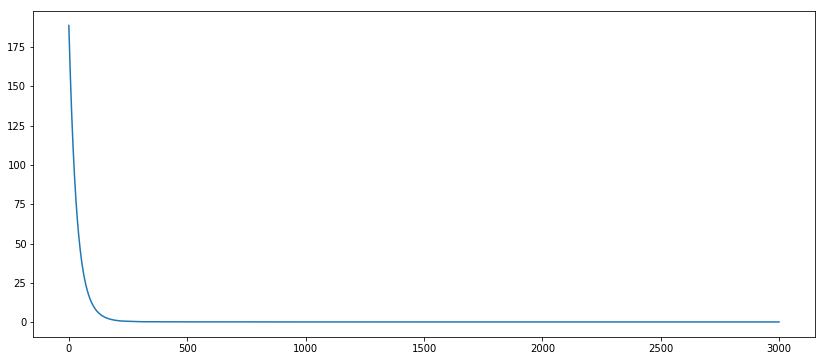

In [293]:
plt.plot(costs)
plt.show()

In [294]:
for i in p:
    print(i)

[ 0.53021955  0.55812103  0.51410705  0.46196252  0.          0.39264226
  0.41318849  0.          0.          0.          0.          0.35753024
  0.          0.          0.          0.          0.31002858  0.34477991
  0.29750001  0.29905039  0.          0.27573997  0.          0.24854696
  0.          0.          0.20839162  0.20222537  0.22139037  0.          0.
  0.25295818  0.          0.          0.3561554   0.24301238  0.24166755
  0.28479546  0.          0.25878015  0.28530094  0.          0.          0.
  0.          0.          0.25331679  0.          0.30238223  0.23792885
  0.          0.          0.          0.25860983  0.          0.          0.2449311
  0.28247076  0.25912273  0.          0.          0.          0.          0.
  0.35415804  0.34224117  0.          0.          0.          0.
  0.38929337  0.3495324   0.          0.36295843  0.34506756  0.
  0.37967572  0.38405833  0.35496059  0.          0.          0.31364134
  0.          0.30837747  0.42645481  0.    